<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851. Tipología y ciclo de vida de los datos · PRAC2</p>
<p style="margin: 0; text-align:right;">2021-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
<div style="width:100%;">&nbsp;</div>

# PRAC 2: Introducción a la limpieza y análisis de los datos

Los objetivos concretos de esta práctica son:

•	Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco conocidos dentro de contextos más amplios o multidisciplinares.
 
• Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar a cabo un proyecto analítico.

•	Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.

•	Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el proceso analítico.

•	Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de aplicación.

•	Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en gran medida autodirigido o autónomo.

•	Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.

# Integrantes de grupo:
* Jorge Useche
* Christian Zamora

# Contenido.

1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?<br>

2. Integración y selección de los datos de interés a analizar.<br>

    2.1 Análisis estadístico básico<br>
    
    2.2 Análisis exploratorio de los datos<br>
    
3. Limpieza de los datos.<br>
    
    3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?<br>
    
    3.2. Identificación y tratamiento de valores extremos.<br>
    
4. Análisis de los datos.<br/>
    
    4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).<br>
    
    4.2. Comprobación de la normalidad y homogeneidad de la varianza.<br>
    
    4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.<br>
    
5. Representación de los resultados a partir de tablas y gráficas.<br>
    
6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?<br>
    
7.	Código: Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.<br>

Para ello vamos a necesitar las siguientes librerías:

# Codificación.

In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# Carga del conjunto de datos

Primero , es necesario obtener el conjunto de datos. En este caso se realizará un analisis de la informacion concerniente a los vinos en la siguiente dirección enlace:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

La fuente original citada por el author esta en la dirección siguiente:

https://archive.ics.uci.edu/ml/datasets/wine+quality

La información puede descargarse desde Internet, la misma se encuentra en formato comprimido .zip la cual se requiere descomprimir para su uso y corresponde solo a la categoria de vinos rojos.

Dentro de la fuente original se encontrarán los archivos de datos para vinos rojos y blancos, adicional a esto la metadata de las columnas.

In [2]:
# Lectura del dataset, cargamos en la variable wine
wine = pd.read_csv('winequality-red.csv')

In [3]:
# Realizamos un despliege corto de la data para verificar su contenido.
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Presentación de la información del conjunto de datos
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observamos que existe un total de 1599 registros, las variables independientes son tipo float (númerica decimal), y la variable dependiente es entero.

# 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?

El análisis estadístico de las propiedades fisicoquímicas del vino son importantes ya que puede determinarse que factor, variable o correlación inciden para que un vino sea considerado “bueno”.	
	
Es posible utilizar un modelo de regresión logística, estableciendo un límite arbitrario para la variable dependiente (calidad del vino) en, por ejemplo, 7 o más, clasificándose como 'bueno / 1' y el resto como 'no bueno / 0 '.

Esto permitirá aplicar un ajuste de hiperparámetros como los algoritmos de árbol de decisión como la curva ROC y el valor AUC.
	
El conjunto de datos contiene información de las variantes de vino rojo y blanco. Estas se encuentran definidas en las variables fisicoquímicas (variable independiente - entrada) y sensoriales (variable dependiente - salida).

A continuación, se describen las variables de entrada y salida:

* 1 - acidez fija
* 2 - acidez volátil
* 3 - ácido cítrico
* 4 - azúcar residual
* 5 - cloruros
* 6 - dióxido de azufre libre
* 7 - dióxido de azufre total
* 8 - densidad
* 9 - pH
* 10 - sulfatos
* 11 - alcohol

La variable de salida (basada en datos sensoriales):

* 12 - calidad (puntuación entre 0 y 10)

# 2.	Integración y selección de los datos de interés a analizar.

Los atributos son variables numéricas que corresponden con características fisicoquímicas del vino, por lo cual es importante conservar todos estos atributos durante la realización en la etapa inicial de selección de datos. Durante esta primera parte del proceso es posible categorizar la variable dependiente de calidad del vino disminuyendo el número de categorías a 2, definiendo los valores mayores a 7 como vinos “buenos”.


# 3. Limpieza de datos

Se implementa la función "limpieza" en donde se eliminan valores nulos, además en esta sección se extraen las variables dependientes de la data. Debido a que el dataset no contiene datos nulos o vacíos, la función "limpieza" no realiza su cometido.

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?

In [5]:
def limpieza(df):
    df.dropna(inplace=True)
    df = df.loc[:, [i for i in df.columns]]
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

wine_clean = limpieza(pd.DataFrame(data = wine, columns = list(wine.columns.values)))

Realizamos una comprobación de datos perdidos para verificar el paso anterior.

In [6]:
wine_clean.isnull().sum() + wine_clean.eq('').sum() + wine_clean.eq(0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

Se aprecia que no existen valores perdidos. Esto se comprueba sumando los elementos Nulls + ceros + blancos. Podemos observar que existen valores 0 para el ácido cítrico, sin embargo, atribuimos ese dato a valores reales de alguna variedad de vino que no contiene esta propiedad.

### 3.2. Identificación y tratamiento de valores extremos.

Los valores extremos u outliers son aquellos cuyos valores sobrepasan un margen numérico al comparar con el resto de datos. A continuación se representan las variables mediante un boxplot para detectar qué valores distan mucho del rango intercuartílico. De esta forma se identificarán los valores atípicos para aquellas columnas que los contengan.

Antes de proceder a identificar los valores extremos, realizamos un escalamiento de valores en el dataset.

In [7]:
wine_clean_x = wine_clean.iloc[:,[i for i in range(len(wine_clean.columns) - 1)]]
wine_clean_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


El código anterior extrae la información de las columnas (variables independientes), luego muestra el resultado del dataset en forma de resumen mediante la función "describe".

In [8]:
escala_standar = preprocessing.StandardScaler()
np_escalados = escala_standar.fit_transform(wine_clean_x)
wine_clean_escal = pd.DataFrame(np_escalados, columns = [name for name in list(wine_clean_x)])
wine_clean_escal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


Presentamos la gráfica a partir del escalamiento de las variables obtenidas en el dataset wine_clen_escal

<AxesSubplot:>

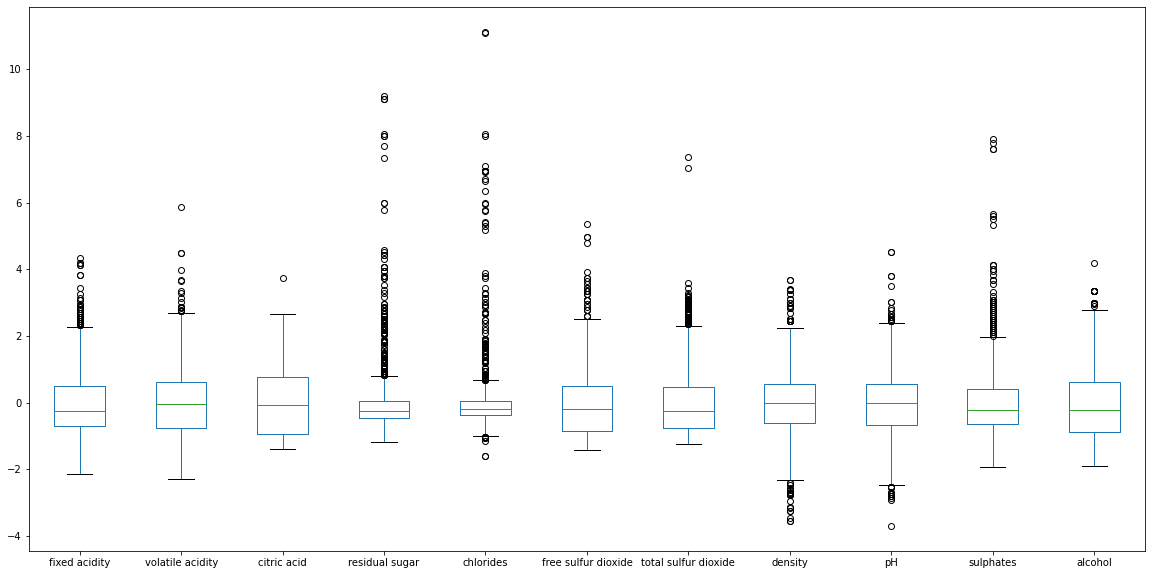

In [9]:
fig = plt.figure(figsize = (20,10))
wine_clean_escal.boxplot(column=[name for name in list(wine_clean_escal)], grid=False)

Se observa en la representación anterior que las variables residuales sugar, chlorides, total sulfur y sulphates contienen datos lejanos u outliers, los mismos que pueden ser eliminados ya que puede atribuirse a un dato erróneo mal ingresado. Sin embargo, pueden presentarse casos en donde las propiedades fisicoquímicas exceden los valores normales debido al proceso de la fermentación del vino, además no se descarta que un vino de alta calidad pueda tener una composición muy rara con valores atipicos. Debido a esto los valores extremos no se los suprime en esta etapa.

# 4. Análisis de datos.

Se aprecia que todos atributos son variables numéricas que corresponden con características fisicoquímicas del vino por lo cual sería importante conservar todos estos atributos durante la realización en la etapa inicial de selección de datos. Durante esta primera parte del proceso es posible categorizar la variable dependiente de calidad del vino disminuyendo el número de categorías a 2, definiendo los valores mayores a 7 como vinos “buenos”.

En primer orden se realiza la selección las columnas que son consideradas variables independientes (causa) para identificar outliers o valores extremos.

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).

Para poder identificar el grado de dependencia con la variable objetivo se realizará el respectivo análisis mediante un modelo de regresión lineal. En primer lugar, debemos conocer la correlación entre las distintas variables con la variable de resultado para identificar cuales tienen mayor influencia. 


La correlación es una técnica estadística para verificar la dependencia entre pares de variables. Se trazar un mapa de calor que se usa para indicar una relación predictiva. Cabe indicar que la correlación entre características no implica una relación causal. Es decir, el coeficiente de correlación en la misma variable es 1. En los demás casos, la correlación tiende a ser menor que 1. El coeficiente de correlación también puede tener una relación inversa, en ese caso el coeficiente de correlación tenderá ser igual a -1. Es decir, cuanto más cerca esté de +1 o -1, más estrechamente se relacionan las dos variables.

In [10]:
wine_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Podemos apreciar que la variable quality es tipo float. Con la finalidad de ayudar en visualización de gráficas, convertimos esta columna en entero.

In [11]:
wine_clean['quality'] = wine_clean['quality'].astype(int)
wine_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Calcula y ordena las correlaciones
matrizCorr = wine_clean.corr()['quality'].sort_values(ascending=False)
print(matrizCorr)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

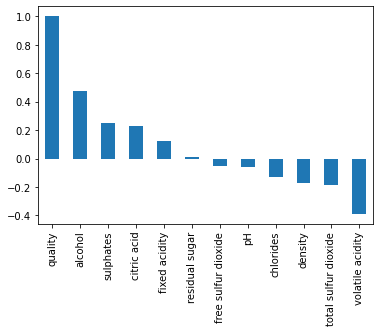

In [13]:
matrizCorr.plot(kind='bar')

In [14]:
print(abs(matrizCorr) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


De todos los valores, estamos seleccionando el alcohol, sulfatos, citric_acid y volatile_acidity con el fin de estudiar mejor y ver la distribución de los valores que separan las diferentes cualidades.

### Porcentaje de Alcohol.

[Text(0.5, 1.0, 'Porcentaje de Alcohol en diferentes calidades de vino.')]

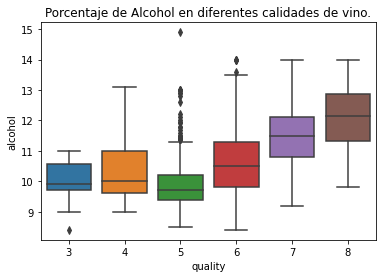

In [15]:
bp = sns.boxplot(x='quality',y='alcohol', data=wine_clean)
bp.set(title="Porcentaje de Alcohol en diferentes calidades de vino.")

En la gráfica anterior podemos ver que los vinos que contienen menos alcohol parecen estar obteniendo peores calificaciones, mientras que los que tienen un porcentaje de alcohol más alto obtienen mejores calificaciones de calidad. Sin embargo, podemos observar cómo los vinos de "calidad media" con calificación 5 o 6 están presentando unos valores extraños.

Para ver por qué tenemos estos valores diferentes, vamos a seleccionar un subconjunto del conjunto de datos que solo contendrá filas cuyo valor de columna de calidad sea 5 o 6, y calcularemos los coeficientes de correlación para este subconjunto.

In [16]:
wine_clean_5_6 = wine_clean.loc[(wine_clean['quality'] >= 5) & (wine_clean['quality'] <= 6)]
wine_clean_5_6['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [17]:
correlations_subset = wine_clean_5_6.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


Luego de calcular las correlaciones para vinos con calidad de 5 y 6 se encuentra que las características que más se correlacionan siguen siendo las mismas de antes. Entonces la diferencia de valores que se muestra en la gráfica de caja se puede explicar debido a que existe (aunque es la más alta) una mala correlación de calidad.

De todas estas características seleccionamos las que tengan mayor número ya que son las que nos darán más información. Para ello vamos a establecer un umbral mínimo de correlación en torno a 0,2 (valor absoluto) ya que no tenemos que tener en cuenta características cuyos valores pueden ser redundantes y no aportar información alguna.

### Presencia de sulfatos y ácido cítrico.

[Text(0.5, 1.0, 'Sulfatos en diferentes calidades de vino.')]

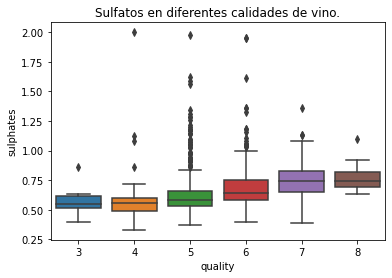

In [18]:
bp = sns.boxplot(x='quality',y='sulphates', data=wine_clean)
bp.set(title="Sulfatos en diferentes calidades de vino.")

[Text(0.5, 1.0, 'Acido citrico en diferentes calidades de vino.')]

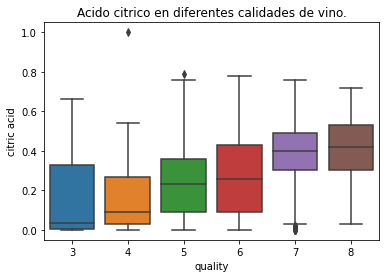

In [19]:
bp = sns.boxplot(x='quality',y='citric acid', data=wine_clean)
bp.set(title="Acido citrico en diferentes calidades de vino.")

La relación entre "sulfatos" y "ácido_cítrico" con la calidad parece ser linealmente positiva, comprobando que los coeficientes de correlación calculados con anterioridad eran correctos. Es decir al parecer aumenta la calidad de los vinos cuando las cantidades de sulfatos y ácido cítrico son cada vez mas altas.

### Presencia de ácido acético.

[Text(0.5, 1.0, 'Presencia de ácido acético en diferentes calidades del vino')]

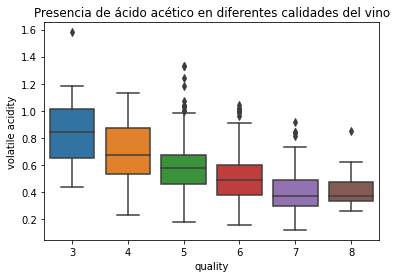

In [20]:
bp = sns.boxplot(x='quality',y='volatile acidity', data=wine_clean)
bp.set(title="Presencia de ácido acético en diferentes calidades del vino")

Se puede observar que una menor presencia de ácido acético en el vino parece aumentar su calidad. 

Una vez estudiado el conjunto de datos a través de diferentes gráficos, seleccionamos las características que usaremos en los diferentes algoritmos. Utilizaremos las mismas columnas que estudiamos en la seccipon anterior, ya que son las variables que más información nos dan entre características y calidad.

In [21]:
wine_clean_sel = wine_clean[['alcohol','volatile acidity','citric acid','sulphates','quality']]
wine_clean_sel.head()

,alcohol,volatile acidity,citric acid,sulphates,quality
0,9.4,0.70,0.00,0.56,5
1,9.8,0.88,0.00,0.68,5
2,9.8,0.76,0.04,0.65,5
3,9.8,0.28,0.56,0.58,6
4,9.4,0.70,0.00,0.56,5


## 4.2. Comprobación de la normalidad y homogeneidad de la varianza.

### 4.2.1 Normalidad.

La prueba shapiro-wilk es una prueba de normalidad. Se utiliza para determinar si una muestra procede o no de una
distribución normal. Se utiliza la función scipy.stats.shapiro() en python para realizar una prueba de Shapiro. 
Esta función devuelve una estadística de prueba y su valor p correspondiente. Si el valor p está por debajo de un cierto nivel
de significancia, entonces tenemos suficiente evidencia para decir que los datos de la muestra no provienen de una
distribución normal.

Se espera tener un valor p mayor que el valor de significancia (es decir, 0.05) para que no se rechace la hipótesis nula. 

In [22]:
from scipy.stats import shapiro

In [23]:
cols = wine_clean_sel.columns
cols[:-1]

Index(['alcohol', 'volatile acidity', 'citric acid', 'sulphates'], dtype='object')

alcohol


/home/jorge/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


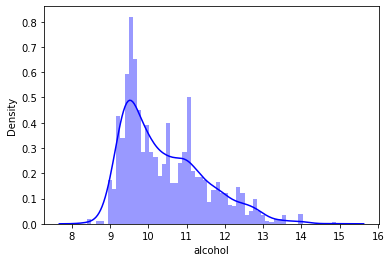

/home/jorge/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Test Estadístico Shapiro : 0.9288 , pvalue : 0.00000000000000000000
No es una distribución normal pvalue < 0.05
****************************************************************************************************
volatile acidity


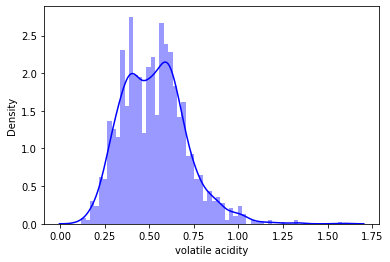

Test Estadístico Shapiro : 0.9743 , pvalue : 0.00000000000000026868
No es una distribución normal pvalue < 0.05
****************************************************************************************************
citric acid


/home/jorge/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


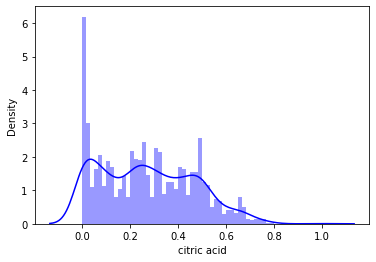

Test Estadístico Shapiro : 0.9553 , pvalue : 0.00000000000000000000
No es una distribución normal pvalue < 0.05
****************************************************************************************************
sulphates


/home/jorge/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


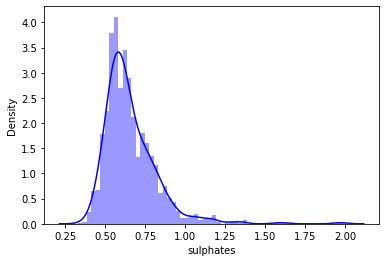

Test Estadístico Shapiro : 0.8330 , pvalue : 0.00000000000000000000
No es una distribución normal pvalue < 0.05
****************************************************************************************************


In [24]:
for i in list(cols[:-1]):
    print(i)
    sns.distplot(wine_clean_sel[i] , color = "b" , bins = 60 , hist_kws = {"alpha" : 0.4})
    plt.show()

    test_statistic , pvalue = shapiro(wine_clean_sel[i]) 
    print("Test Estadístico Shapiro : %.4f , pvalue : %.20f" % (test_statistic , pvalue))
    if pvalue > 0.05:
        print('Es una distribución normal pvalue > 0.05')
    else:
        print('No es una distribución normal pvalue < 0.05')

    print("*"*100)

Podemos observar que los conjutnos de datos no son normales, aunque gráficamente parecen serlo debido al gran tamaño de la muestra. Debido a esto el tamaño de pvalue es tan pequeño y no llega a 0.05. 

### 4.2.1 Homogeneidad de la varianza.

Separamos en dos conjuntos de datos la calidad del vino >= 7 buen vino con valor de 1, y menor a 7 con valor de 0.

In [25]:
wine_clean_sel['best_quality'] = [ 1 if x>=7 else 0 for x in wine_clean_sel.quality]; 
wine_clean_sel.head()


<ipython-input-25-29de1df08bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_clean_sel['best_quality'] = [ 1 if x>=7 else 0 for x in wine_clean_sel.quality];


,alcohol,volatile acidity,citric acid,sulphates,quality,best_quality
0,9.4,0.70,0.00,0.56,5,0
1,9.8,0.88,0.00,0.68,5,0
2,9.8,0.76,0.04,0.65,5,0
3,9.8,0.28,0.56,0.58,6,0
4,9.4,0.70,0.00,0.56,5,0


In [26]:
wine_clean_sel

,alcohol,volatile acidity,citric acid,sulphates,quality,best_quality
0,9.4,0.700,0.00,0.56,5,0
1,9.8,0.880,0.00,0.68,5,0
2,9.8,0.760,0.04,0.65,5,0
3,9.8,0.280,0.56,0.58,6,0
4,9.4,0.700,0.00,0.56,5,0
...,...,...,...,...,...,...
1594,10.5,0.600,0.08,0.58,5,0
1595,11.2,0.550,0.10,0.76,6,0
1596,11.0,0.510,0.13,0.75,6,0
1597,10.2,0.645,0.12,0.71,5,0


Agrupamos las variables segun la calidad del vino.

In [27]:
alcohol_good = wine_clean_sel.loc[wine_clean_sel.best_quality == 1, 'alcohol']
alcohol_bad = wine_clean_sel.loc[wine_clean_sel.best_quality == 0, 'alcohol']

volatile_good = wine_clean_sel.loc[wine_clean_sel.best_quality == 1, 'volatile acidity']
volatile_bad = wine_clean_sel.loc[wine_clean_sel.best_quality == 0, 'volatile acidity']

citric_good = wine_clean_sel.loc[wine_clean_sel.best_quality == 1, 'citric acid']
citric_bad = wine_clean_sel.loc[wine_clean_sel.best_quality == 0, 'citric acid']

sulphates_good = wine_clean_sel.loc[wine_clean_sel.best_quality == 1, 'sulphates']
sulphates_bad = wine_clean_sel.loc[wine_clean_sel.best_quality == 0, 'sulphates']

#### 4.2.1.a Método de contraste de hipótesis.

La homogeneidad de la varianza conocida como "supuesto de homocedasticidad" podemos verificarlo mediente los tests de Levene, Bartlett o Fligner-Killeen que son empleados generalmente para comparar la varianza entre grupos. Estos test indican que la hipótesis nula consiste en que ambas varianzas son iguales o constantes (no varía) en los diferentes niveles de un factor. Esta condición de homocedasticidad también hace referencia a los errores (residuos) en los modelos de regresión lineal. Si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad en favor de la heterocedasticidad

El test de Levene y el test de Fligner-Killeen (este último no paramétrico) son más robustos que el test de Bartlett ante la  falta de normalidad, por lo que suele desaconsejarse su uso. El test de Levene y Bartlett permiten elegir diferentes datos estadísticos centrales como: mediana, media, media truncada siendo importante a la hora de contrastar la homocedasticidad dependiendo de si los grupos se distribuyen de forma normal o no.

Si se tiene seguridad de que las muestras a comparar proceden de poblaciones que siguen una distribución normal, es
recomendable el test de Bartlett. De lo contrario se recomienda los tests de Leven el de Fligner-Killeen que se basan en la mediana.

In [28]:
from scipy.stats import fligner
from scipy.stats import levene
from scipy.stats import bartlett

In [29]:
# Levene test
# ==============================================================================
lt_alcohol = levene(alcohol_good, alcohol_bad, center='median')
lt_volatile = levene(volatile_good, volatile_bad, center='median')
lt_citric = levene(citric_good, citric_bad, center='median')
lt_sulphates = levene(sulphates_good, sulphates_bad, center='median')


In [30]:
lt_alcohol

LeveneResult(statistic=1.4506052991623122, pvalue=0.2286093177882187)

In [31]:
lt_citric

LeveneResult(statistic=1.0565894298700909, pvalue=0.3041500057401553)

In [32]:
lt_volatile

LeveneResult(statistic=12.95372692624227, pvalue=0.0003290322779476845)

In [33]:
lt_sulphates

LeveneResult(statistic=0.7069295576826025, pvalue=0.40059087951099637)

Ninguno de los test muestra evidencias para rechazar la hipótesis de que los dos grupos tienen la misma varianza, homocedasticidad. p-value >>>> 0.05, a excepción del acido cítrico

#### 4.2.1.b Métodos gráficos.

Los métodos gráficos tambien se utilizan para analizar la homocedasticidad, estos consisten en presentar los datos mediante boxplots o violinplot, ya que permiten comparar la dispersión de los grupos.

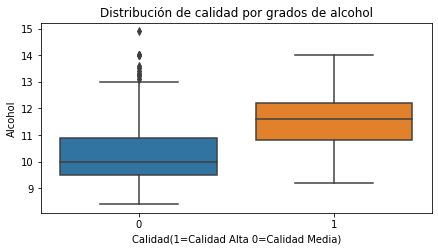

In [34]:
# Grafico de cajas
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'best_quality',
    y       = 'alcohol',
    data    = wine_clean_sel,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de calidad por grados de alcohol')
ax.set_xlabel('Calidad(1=Calidad Alta 0=Calidad Media)')
ax.set_ylabel('Alcohol');

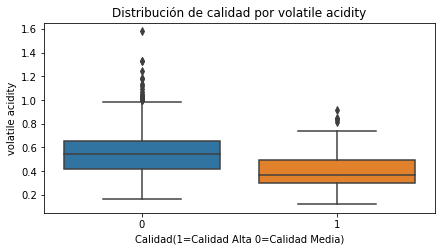

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'best_quality',
    y       = 'volatile acidity',
    data    = wine_clean_sel,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de calidad por volatile acidity')
ax.set_xlabel('Calidad(1=Calidad Alta 0=Calidad Media)')
ax.set_ylabel('volatile acidity');

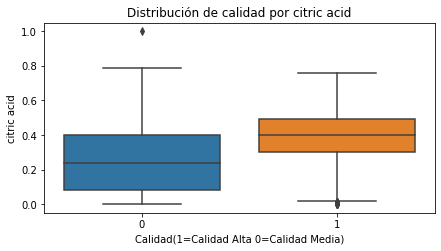

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'best_quality',
    y       = 'citric acid',
    data    = wine_clean_sel,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de calidad por citric acid')
ax.set_xlabel('Calidad(1=Calidad Alta 0=Calidad Media)')
ax.set_ylabel('citric acid');

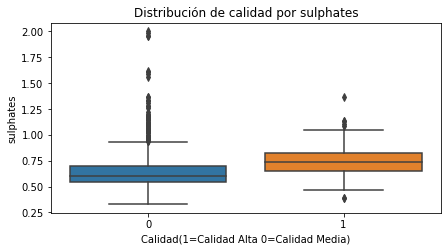

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'best_quality',
    y       = 'sulphates',
    data    = wine_clean_sel,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de calidad por sulphates')
ax.set_xlabel('Calidad(1=Calidad Alta 0=Calidad Media)')
ax.set_ylabel('sulphates');

## 4.3.	Aplicación de pruebas estadísticas para comparar los grupos de datos. 

En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

### 4.3.1 Matriz de correlación (en forma de mapa de calor).

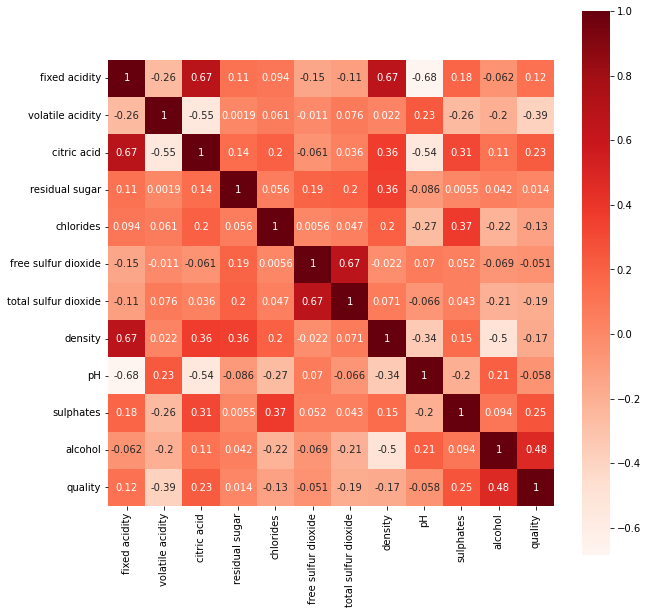

In [38]:
matrizCorr = wine_clean.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(matrizCorr, vmax=1, square=True,annot=True, cmap="Reds")
plt.show()

Podemos observar algunas correlaciones de características como el pH y la acidez. Aparte de eso se aprecia que aproximadamente la mitad de estas características se correlacionan positivamente con la calidad mientras que la otra mitad correlacionan negativamente.

El mapa de calor muestra las correlaciones entre las variables, vemos que la diagonal esta altamente relacionada y esto es
lógico ya que todas las variables están correlacionadas consigo misma, entre más oscuro es este recuadro donde coinciden dos
variables significa que hay una fuerte correlación positiva, y entre mas claro indica que hay una correlación a la inversa.



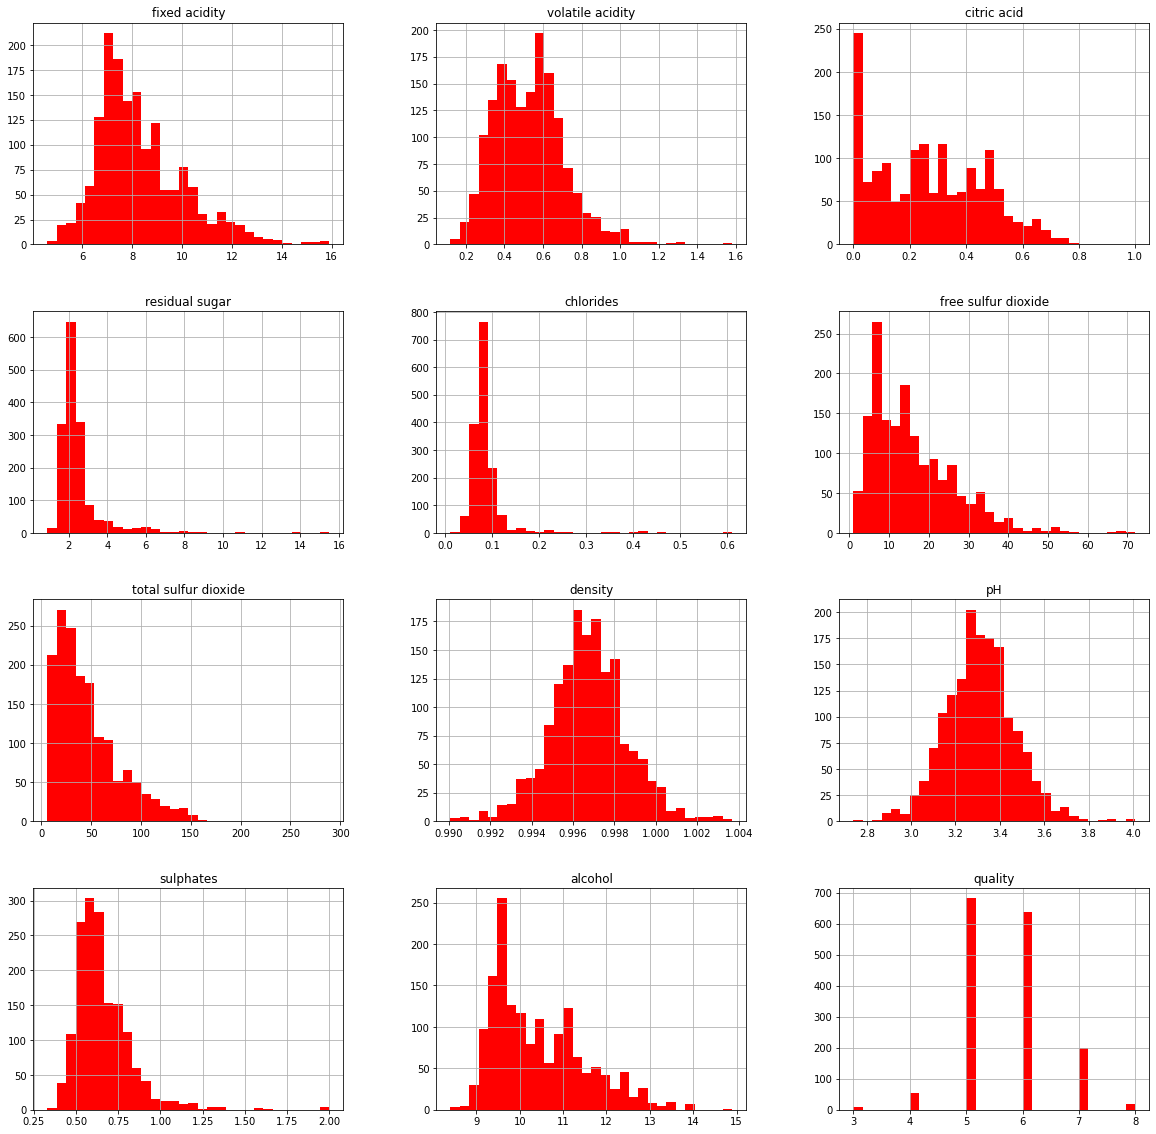

In [39]:
wine_clean.hist(bins = 30, figsize=(20,20), color = 'r')
plt.show()


Regresión lineal con statsmodel

## Construcción de un modelo lineal

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

correlations = wine_clean.corr()["quality"].drop("quality")
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [41]:
def get_features(correlation_threshold):
    max_corrs = correlations.abs()
    high_correaltions = max_corrs
    high_correaltions =  max_corrs[max_corrs > correlation_threshold].index.values.tolist()

    return high_correaltions

In [42]:
features = get_features(0.1)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [43]:
X = wine_clean[features]
y = wine_clean['quality'] 
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [44]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

[ 4.54102614e-02 -1.24989230e+00 -8.39356452e-02 -1.62706838e+00
 -2.10542489e-03 -1.92332269e+01  8.48272019e-01  2.61573503e-01]


In [47]:
train_pred = lr.predict(X_train)
print(train_pred)

[6.44699101 6.53963514 5.33697491 ... 5.31319313 6.43831685 4.50615713]


In [48]:
test_pred = lr.predict(X_test)
print(test_pred)

[5.80940115 5.00303269 6.58515976 5.37310421 5.98555971 5.04338722
 5.36334414 6.08637524 4.85333247 4.9618068  5.33412225 5.42085155
 5.73081615 5.13990618 5.51788349 6.34268413 6.80434987 5.77369428
 5.98145048 5.07460175 6.25812873 5.25397497 5.64835583 5.92820722
 5.5783665  5.03812036 5.24045845 6.46272639 5.34993558 6.3759156
 6.07662188 5.85535736 5.57762302 5.34665947 5.690327   6.24051928
 5.20795208 5.56402085 6.4031938  5.77849424 5.45134281 5.96104695
 6.60299062 6.58517869 5.98934955 4.70927029 5.46950708 6.01920686
 5.60703804 6.1422741  5.37614237 5.35345173 5.61293137 6.43831685
 5.79131383 5.27663875 5.14637622 5.29493236 6.52716038 5.47103051
 5.26981099 5.74349778 6.0069021  6.31914348 5.13639465 6.10522136
 5.32427792 5.98409572 6.14449304 5.95060824 5.31884989 5.48086565
 5.06863927 5.50681805 5.61089165 6.24161359 5.41920642 5.37757256
 5.67798968 6.2674796  5.75504974 5.33482054 5.94769837 6.09976097
 5.47431412 5.35922065 6.09313623 5.1250936  5.39079819 4.98375

In [49]:
rmse_train = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(rmse_train)

0.6549840223740327


In [50]:
rmse_test = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(rmse_test)

0.6352739135998484


In [51]:
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 5. 7. 5. 6. 5. 5. 6. 5. 5. 5. 5. 6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 6.
 6. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 6. 5. 6. 7. 7. 6. 5. 5. 6.
 6. 6. 5. 5. 6. 6. 6. 5. 5. 5. 7. 5. 5. 6. 6. 6. 5. 6. 5. 6. 6. 6. 5. 5.
 5. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 6. 5. 6. 5.
 6. 5. 5. 6. 7. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 6.
 5. 6. 5. 5. 6. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 5. 5.
 6. 6. 6. 6. 6. 5. 6. 6. 5. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 7.
 5. 6. 6. 6. 5. 7. 6. 6. 6. 7. 6. 5. 5. 7. 5. 6. 7. 5. 6. 6. 5. 6. 6. 6.
 5. 6. 5. 5. 5. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 6. 6. 5. 6. 6. 5. 6. 5. 5.
 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 6. 6. 7. 7. 6.
 5. 5. 5. 5. 6. 5. 6. 5. 5. 6. 5. 5. 5. 5. 6. 6. 5. 5. 5. 6. 5. 7. 5. 6.
 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 7. 6. 5. 7. 6. 6. 6. 5. 6. 5.
 6. 6. 6. 5. 6. 5. 5. 6. 6. 5. 5. 5. 6. 5. 5. 6. 6. 6. 5. 5. 6. 5. 6. 6.
 5. 5. 5. 7. 6. 6. 5. 6. 5. 6. 6. 6. 5. 5. 7. 6. 5.

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))

Mean Absolute Error: 0.4923664687885067
Mean Squared Error: 0.4035729453004677
Root Mean Squared Error: 0.6352739135998484


In [53]:
coefficients = pd.DataFrame(lr.coef_, features) 
coefficients.columns = ['Coefficient']
print(coefficients)

                      Coefficient
fixed acidity            0.045410
volatile acidity        -1.249892
citric acid             -0.083936
chlorides               -1.627068
total sulfur dioxide    -0.002105
density                -19.233227
sulphates                0.848272
alcohol                  0.261574


Los coeficientes anteriores denotan el impacto de cada variable en la Calidad del Vino. Por cada aumento de la medida de alcohol aumentará un 0,26 en la calidad. El aumento de cloruros disminuirá la calidad del vino.